In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


ModuleNotFoundError: No module named 'cv2'

In [2]:
pip install opencv-python


   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
    --------------------------------------- 0.8/40.2 MB 5.6 MB/s eta 0:00:08
   - -------------------------------------- 1.3/40.2 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.6/40.2 MB 2.3 MB/s eta 0:00:17
   - -------------------------------------- 1.6/40.2 MB 2.3 MB/s eta 0:00:17
   - -------------------------------------- 1.6/40.2 MB 2.3 MB/s eta 0:00:17
   - -------------------------------------- 1.8/40.2 MB 1.3 MB/s eta 0:00:29
   - -------------------------------------- 1.8/40.2 MB 1.3 MB/s eta 0:00:29
   -- ------------------------------------- 2.1/40.2 MB 1.2 MB/s eta 0:00:32
   -- ------------------------------------- 2.4/40.2 MB 1.2 MB/s eta 0:00:32
   -- ------------------------------------- 2.9/40.2 MB 1.3 MB/s eta 0:00:30
   --- ------------------------------------ 3.1/40.2 MB 1.3 MB/s eta 0:00:29
   --- ------

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
video_path = video_path = r"C:\Users\nayan\Downloads\seq3-drone_0000182.jpg"
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print("FPS:", fps)
print("Resolution:", width, "x", height)

FPS: 25.0
Resolution: 1920 x 1080


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

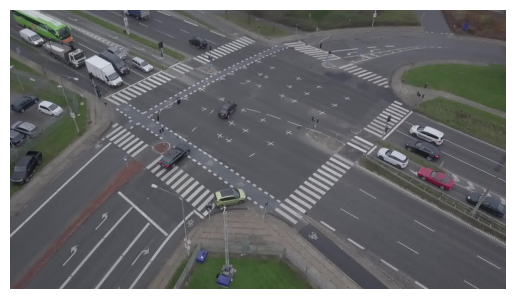

In [35]:
ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.axis("off")

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

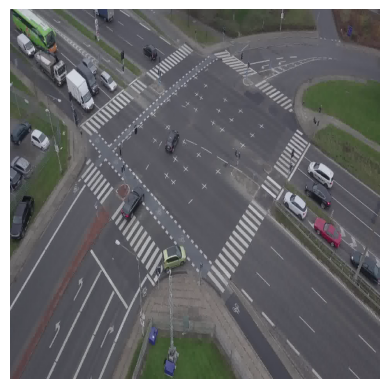

In [36]:
TARGET_SIZE = 640
frame_resized = cv2.resize(frame, (TARGET_SIZE, TARGET_SIZE))

plt.imshow(cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB))
plt.axis("off")


(np.float64(-0.5), np.float64(439.5), np.float64(399.5), np.float64(-0.5))

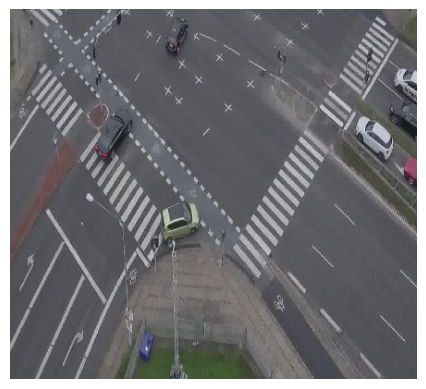

In [37]:
# Example ROI (adjust after visual inspection)
roi = frame_resized[200:600, 100:540]

plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.axis("off")


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

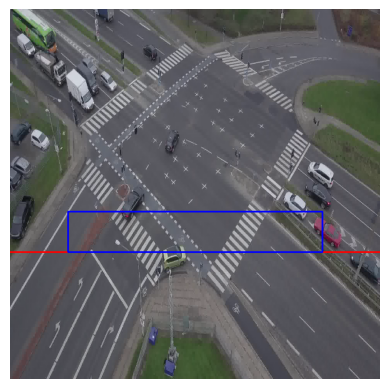

In [38]:
annotated = frame_resized.copy()

# Stop line
cv2.line(annotated, (0, 420), (640, 420), (0, 0, 255), 2)

# Queue zone
cv2.rectangle(annotated, (100, 350), (540, 420), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis("off")


In [13]:
cv2.imwrite("samples/sample_preprocessed_frame.jpg", annotated)

False

In [47]:
import cv2
import os
from pathlib import Path

# =========================
# USER INPUTS (EDIT ONLY THIS PART)
# =========================

VIDEO_PATH = r"C:\Users\nayan\Downloads\seq3-drone_0000182.jpg"  # MUST be a video file
OUTPUT_DIR = r"C:\Users\nayan\OneDrive\Desktop\intelligent-traffic analysis\outputs\pre_processed_videos"

# =========================
# BASIC VALIDATION
# =========================

if not os.path.exists(VIDEO_PATH):
    raise FileNotFoundError(f"Video file not found: {VIDEO_PATH}")

os.makedirs(OUTPUT_DIR, exist_ok=True)

# =========================
# PREPROCESSING PARAMETERS
# =========================

TARGET_WIDTH = 640
TARGET_HEIGHT = 640
STOP_LINE_Y = 420
QUEUE_ZONE = (100, 350, 540, 420)
FRAME_SKIP = 2   # save every 2nd frame

# =========================
# FRAME PREPROCESS FUNCTION
# =========================

def preprocess_frame(frame):
    frame = cv2.resize(frame, (TARGET_WIDTH, TARGET_HEIGHT))

    # Draw stop line
    cv2.line(
        frame,
        (0, STOP_LINE_Y),
        (TARGET_WIDTH, STOP_LINE_Y),
        (0, 0, 255),
        2
    )

    # Draw queue zone
    x1, y1, x2, y2 = QUEUE_ZONE
    cv2.rectangle(
        frame,
        (x1, y1),
        (x2, y2),
        (255, 0, 0),
        2
    )

    return frame

# =========================
# VIDEO CAPTURE (WINDOWS SAFE)
# =========================

cap = cv2.VideoCapture(VIDEO_PATH, cv2.CAP_FFMPEG)

if not cap.isOpened():
    raise Exception("❌ OpenCV cannot open the video. Check codec or file.")

# =========================
# OUTPUT SETUP
# =========================

video_name = Path(VIDEO_PATH).stem
save_dir = os.path.join(OUTPUT_DIR, video_name)
os.makedirs(save_dir, exist_ok=True)

# =========================
# FRAME PROCESSING LOOP
# =========================

frame_id = 0
saved_frames = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_id % FRAME_SKIP == 0:
        processed = preprocess_frame(frame)
        out_path = os.path.join(save_dir, f"frame_{saved_frames:05d}.jpg")
        cv2.imwrite(out_path, processed)
        saved_frames += 1

    frame_id += 1

cap.release()

print(f"✅ DONE: Saved {saved_frames} frames to:")
print(save_dir)


✅ DONE: Saved 1 frames to:
C:\Users\nayan\OneDrive\Desktop\intelligent-traffic analysis\outputs\pre_processed_videos\seq3-drone_0000182


In [25]:
pip install ultralytics


INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 460.4 kB/s eta 0:00:02
   ----------------- ---------------------- 0.5/1.2 MB 460.4 kB/s eta 0:00:02
   -------------------------- ------------- 0.8/1.2 MB 554.9 kB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.2 MB 636.6 kB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 669.8 kB/s  0:00:01
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1

In [27]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\nayan\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [28]:
model = YOLO("yolov8n.pt")  # nano model (fast, enough for hackathon)


In [49]:
import cv2
import os

frame_path = r"C:\Users\nayan\OneDrive\Desktop\intelligent-traffic analysis\outputs\pre_processed_videos\seq3-drone_0000182\frame_00000.jpg"

img = cv2.imread(frame_path)

if img is None:
    raise Exception("Image not loaded")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [50]:
results = model(img_rgb)



0: 640x640 1 car, 1 bus, 327.1ms
Speed: 18.0ms preprocess, 327.1ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

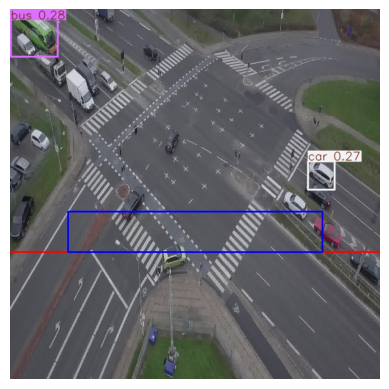

In [51]:
annotated = results[0].plot()
plt.imshow(annotated)
plt.axis("off")


In [76]:
import os
import shutil

# =========================
# PATHS (EDIT THESE)
# =========================

SOURCE_DIR = r"E:\intelligent-traffic analysis\data\new\validation\S05\C035"
TARGET_DIR = r"E:\intelligent-traffic analysis\data\videos\new"

# =========================
# SETUP
# =========================

os.makedirs(TARGET_DIR, exist_ok=True)

VIDEO_EXTENSIONS = (".avi", ".mp4", ".mov", ".mkv")

# =========================
# COPY ONLY VIDEOS
# =========================

copied = 0

for file_name in os.listdir(SOURCE_DIR):
    src_path = os.path.join(SOURCE_DIR, file_name)

    if os.path.isfile(src_path) and file_name.lower().endswith(VIDEO_EXTENSIONS):
        dst_path = os.path.join(TARGET_DIR, file_name)
        shutil.copy2(src_path, dst_path)
        copied += 1

print(f"Copied {copied} video files to:\n{TARGET_DIR}")


Copied 1 video files to:
E:\intelligent-traffic analysis\data\videos\new


In [77]:
import os
import shutil

# =========================
# EDIT THESE PATHS
# =========================

SOURCE_ROOT = r"E:\intelligent-traffic analysis"
FINAL_VIDEO_DIR = r"E:\FINAL_VIDEOS"

# =========================
# SETUP
# =========================

os.makedirs(FINAL_VIDEO_DIR, exist_ok=True)

VIDEO_EXTENSIONS = (".avi", ".mp4", ".mov", ".mkv")

copied = 0

# =========================
# WALK THROUGH ALL SUBFOLDERS
# =========================

for root, dirs, files in os.walk(SOURCE_ROOT):
    for file in files:
        if file.lower().endswith(VIDEO_EXTENSIONS):
            src_path = os.path.join(root, file)

            # Prefix folder name to avoid overwrite
            folder_name = os.path.basename(root)
            new_name = f"{folder_name}_{file}"

            dst_path = os.path.join(FINAL_VIDEO_DIR, new_name)

            shutil.copy2(src_path, dst_path)
            copied += 1

print(f" DONE: {copied} videos extracted to:")
print(FINAL_VIDEO_DIR)


✅ DONE: 320 videos extracted to:
E:\FINAL_VIDEOS


In [78]:
import cv2
import os
from pathlib import Path

# =========================
# PATHS (EDIT ONLY THESE)
# =========================

INPUT_VIDEO_DIR = r"E:\intelligent-traffic analysis\data\videos\FINAL_VIDEOS"
OUTPUT_DIR = r"E:\intelligent-traffic analysis\outputsS"

os.makedirs(OUTPUT_DIR, exist_ok=True)

# =========================
# PREPROCESS PARAMETERS
# =========================

TARGET_WIDTH = 1280      # better for small vehicles
TARGET_HEIGHT = 1280

STOP_LINE_Y = 850        # adjust based on view
QUEUE_ZONE = (200, 700, 1080, 850)  # (x1, y1, x2, y2)

FRAME_SKIP = 2           # save every 2nd frame

VIDEO_EXTENSIONS = (".avi", ".mp4", ".mov", ".mkv")

# =========================
# FRAME PREPROCESS FUNCTION
# =========================

def preprocess_frame(frame):
    frame = cv2.resize(frame, (TARGET_WIDTH, TARGET_HEIGHT))

    # Draw stop line (RED)
    cv2.line(
        frame,
        (0, STOP_LINE_Y),
        (TARGET_WIDTH, STOP_LINE_Y),
        (0, 0, 255),
        2
    )

    # Draw queue zone (BLUE)
    x1, y1, x2, y2 = QUEUE_ZONE
    cv2.rectangle(
        frame,
        (x1, y1),
        (x2, y2),
        (255, 0, 0),
        2
    )

    return frame

# =========================
# PROCESS ALL VIDEOS
# =========================

video_files = [
    f for f in os.listdir(INPUT_VIDEO_DIR)
    if f.lower().endswith(VIDEO_EXTENSIONS)
]

print(f"Found {len(video_files)} videos")

for video_name in video_files:
    video_path = os.path.join(INPUT_VIDEO_DIR, video_name)
    cap = cv2.VideoCapture(video_path, cv2.CAP_FFMPEG)

    if not cap.isOpened():
        print(f"Cannot open {video_name}")
        continue

    save_dir = os.path.join(OUTPUT_DIR, Path(video_name).stem)
    os.makedirs(save_dir, exist_ok=True)

    frame_id = 0
    saved_frames = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_id % FRAME_SKIP == 0:
            processed = preprocess_frame(frame)

            out_path = os.path.join(
                save_dir, f"frame_{saved_frames:05d}.jpg"
            )

            cv2.imwrite(out_path, processed)
            saved_frames += 1

        frame_id += 1

    cap.release()
    print(f"{video_name} → {saved_frames} frames saved")

print("ALL VIDEOS PREPROCESSED SUCCESSFULLY")


Found 47 videos
c001_vdo.avi → 978 frames saved
c002_vdo.avi → 1055 frames saved
c003_vdo.avi → 998 frames saved
c004_vdo.avi → 1055 frames saved
c005_vdo.avi → 1055 frames saved
c006_vdo.avi → 1055 frames saved
c007_vdo.avi → 983 frames saved
c008_vdo.avi → 962 frames saved
c009_vdo.avi → 1055 frames saved
c010_vdo.avi → 2036 frames saved
c011_vdo.avi → 1140 frames saved
c012_vdo.avi → 1211 frames saved
c013_vdo.avi → 1208 frames saved
c014_vdo.avi → 1166 frames saved
c015_vdo.avi → 964 frames saved
c016_vdo.avi → 1970 frames saved
c017_vdo.avi → 1940 frames saved
c018_vdo.avi → 1922 frames saved
c019_vdo.avi → 1949 frames saved
c020_vdo.avi → 1987 frames saved
c021_vdo.avi → 2001 frames saved
c022_vdo.avi → 2139 frames saved
c023_vdo.avi → 2128 frames saved
c024_vdo.avi → 2150 frames saved
c025_vdo.avi → 2140 frames saved
c026_vdo.avi → 2089 frames saved
c027_vdo.avi → 1923 frames saved
c028_vdo.avi → 1913 frames saved
c029_vdo.avi → 1773 frames saved
c030_vdo.avi → 316 frames saved


In [81]:
import os
import cv2
from ultralytics import YOLO

# =========================
# PATHS (EDIT THESE)
# =========================

INPUT_FRAMES_DIR = r"E:\intelligent-traffic analysis\data\videos\FINAL_VIDEOS"
OUTPUT_DIR = r"E:\YOLO_OUTPUT"

os.makedirs(OUTPUT_DIR, exist_ok=True)

# =========================
# LOAD YOLO MODEL
# =========================

model = YOLO("yolov8m.pt")  # m or l recommended for aerial view

# Vehicle class IDs in COCO
VEHICLE_CLASSES = [2, 3, 5, 7]  
# 2: car, 3: motorbike, 5: bus, 7: truck

# =========================
# PROCESS EACH VIDEO FOLDER
# =========================

for video_folder in os.listdir(INPUT_FRAMES_DIR):
    video_path = os.path.join(INPUT_FRAMES_DIR, video_folder)

    if not os.path.isdir(video_path):
        continue

    output_video_dir = os.path.join(OUTPUT_DIR, video_folder)
    os.makedirs(output_video_dir, exist_ok=True)

    frame_files = sorted([
        f for f in os.listdir(video_path)
        if f.lower().endswith(".jpg")
    ])

    print(f"🚗 Processing {video_folder} | Frames: {len(frame_files)}")

    for frame_name in frame_files:
        frame_path = os.path.join(video_path, frame_name)
        frame = cv2.imread(frame_path)

        if frame is None:
            continue

        # YOLO detection
        results = model.predict(
            frame,
            conf=0.15,      # lower for small vehicles
            iou=0.5,
            imgsz=1280,
            classes=VEHICLE_CLASSES,
            verbose=False
        )

        annotated = frame.copy()

        for r in results:
            for box in r.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                conf = float(box.conf[0])
                cls = int(box.cls[0])
                label = model.names[cls]

                cv2.rectangle(
                    annotated, (x1, y1), (x2, y2),
                    (0, 255, 0), 2
                )

                cv2.putText(
                    annotated,
                    f"{label} {conf:.2f}",
                    (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6,
                    (0, 255, 0),
                    2
                )

        out_path = os.path.join(output_video_dir, frame_name)
        cv2.imwrite(out_path, annotated)

    print(f"Done: {video_folder}")

print("YOLO DETECTION COMPLETED FOR ALL VIDEOS")


YOLO DETECTION COMPLETED FOR ALL VIDEOS


In [80]:
import cv2
import os
import matplotlib.pyplot as plt

YOLO_OUTPUT_DIR = r"E:\YOLO_OUTPUT\c041_xxx"

image_files = sorted([
    f for f in os.listdir(YOLO_OUTPUT_DIR)
    if f.lower().endswith(".jpg")
])

img = cv2.imread(os.path.join(YOLO_OUTPUT_DIR, image_files[0]))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:\\YOLO_OUTPUT\\c041_xxx'

In [2]:
import os

INPUT_FRAMES_DIR = r"E:\intelligent-traffic analysis\data\videos\FINAL_VIDEOS"

for folder in os.listdir(INPUT_FRAMES_DIR):
    path = os.path.join(INPUT_FRAMES_DIR, folder)
    if os.path.isdir(path):
        images = [f for f in os.listdir(path) if f.endswith(".jpg")]
        print(folder, "->", len(images), "frames")

In [4]:
from ultralytics import YOLO
import cv2

model = YOLO("yolov8m.pt")

img_path = r"E:\intelligent-traffic analysis\outputsS\c002_vdo\frame_00086.jpg"
img = cv2.imread(img_path)

results = model.predict(
    img,
    conf=0.1,
    imgsz=1280,
    verbose=True
)

annotated = results[0].plot()
cv2.imshow("YOLO TEST", annotated)
cv2.waitKey(0)
cv2.destroyAllWindows()


0: 1280x1280 13 cars, 1 truck, 5 traffic lights, 2881.5ms
Speed: 88.9ms preprocess, 2881.5ms inference, 27.1ms postprocess per image at shape (1, 3, 1280, 1280)


In [6]:
import os
import cv2
from ultralytics import YOLO

INPUT_FRAMES_DIR =r"E:\intelligent-traffic analysis\data\videos\FINAL_VIDEOS"
OUTPUT_DIR = r"E:\YOLO_OUTPUT"

os.makedirs(OUTPUT_DIR, exist_ok=True)

model = YOLO("yolov8m.pt")
VEHICLE_CLASSES = [2, 3, 5, 7]  # car, bike, bus, truck

for folder in os.listdir(INPUT_FRAMES_DIR):
    in_dir = os.path.join(INPUT_FRAMES_DIR, folder)

    if not os.path.isdir(in_dir):
        continue

    out_dir = os.path.join(OUTPUT_DIR, folder)
    os.makedirs(out_dir, exist_ok=True)

    images = sorted([f for f in os.listdir(in_dir) if f.endswith(".jpg")])
    print(f"\n{folder}: {len(images)} frames")

    for img_name in images:
        img_path = os.path.join(in_dir, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue

        results = model.predict(
            img,
            conf=0.1,
            imgsz=1280,
            classes=VEHICLE_CLASSES,
            verbose=False
        )

        detections = len(results[0].boxes)
        print(f"{img_name} → {detections} detections")

        annotated = results[0].plot()

        cv2.imwrite(os.path.join(out_dir, img_name), annotated)

print("\nYOLO PROCESS COMPLETED")



YOLO PROCESS COMPLETED


In [7]:
roi = img[700:850, 200:1080]
results = model.predict(roi, conf=0.1, imgsz=1536)


0: 288x1536 (no detections), 856.4ms
Speed: 13.9ms preprocess, 856.4ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 1536)


In [8]:
annotated = results[0].plot()

cv2.imshow("YOLO ROI Output", annotated)
cv2.waitKey(0)
cv2.destroyAllWindows()


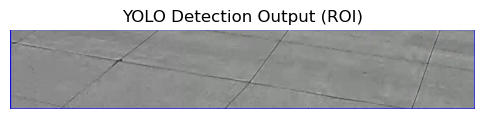

In [9]:
import matplotlib.pyplot as plt
import cv2

annotated = results[0].plot()

annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 10))
plt.imshow(annotated_rgb)
plt.axis("off")
plt.title("YOLO Detection Output (ROI)")
plt.show()


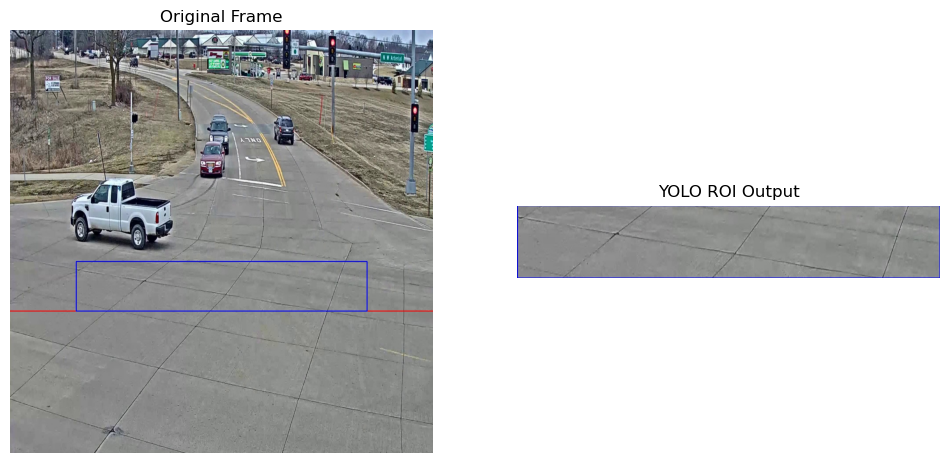

In [10]:
import matplotlib.pyplot as plt
import cv2

roi_annotated = results[0].plot()
roi_annotated = cv2.cvtColor(roi_annotated, cv2.COLOR_BGR2RGB)

original_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title("Original Frame")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(roi_annotated)
plt.title("YOLO ROI Output")
plt.axis("off")

plt.show()


In [12]:
import cv2
import os

YOLO_OUTPUT_DIR = r"E:\intelligent-traffic analysis\outputsS\c008_vdo"

image_files = sorted([
    f for f in os.listdir(YOLO_OUTPUT_DIR)
    if f.lower().endswith(".jpg")
])

for img_name in image_files:
    img_path = os.path.join(YOLO_OUTPUT_DIR, img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    cv2.imshow("YOLO Detection Output", img)

    if cv2.waitKey(30) & 0xFF == 27:  # ~30 FPS, ESC to quit
        break

cv2.destroyAllWindows()


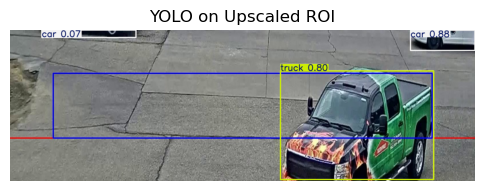

In [13]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO("yolov8l.pt")  # use large model

# --- ORIGINAL ROI ---
roi = img[600:950, 100:1180]   # adjust if needed

# --- UPSCALE ROI ---
roi_upscaled = cv2.resize(
    roi,
    None,
    fx=2.5, fy=2.5,            # 🔥 SCALE FACTOR
    interpolation=cv2.INTER_CUBIC
)

# --- YOLO ON UPSCALED ROI ---
results = model.predict(
    roi_upscaled,
    conf=0.05,
    imgsz=1536,
    verbose=False
)

annotated = results[0].plot()

# --- VISUALIZE ---
plt.figure(figsize=(6, 10))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title("YOLO on Upscaled ROI")
plt.axis("off")
plt.show()


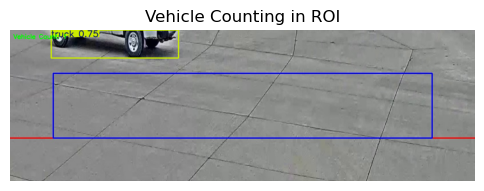

Vehicle count: 1


In [14]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# =========================
# LOAD MODEL
# =========================
model = YOLO("yolov8l.pt")   # use large model for small vehicles

# =========================
# LOAD IMAGE
# =========================
img_path = r"E:\intelligent-traffic analysis\outputsS\c002_vdo\frame_00086.jpg"
img = cv2.imread(img_path)

# =========================
# DEFINE ROI (ADJUST IF NEEDED)
# =========================
x1, y1, x2, y2 = 100, 600, 1180, 950
roi = img[y1:y2, x1:x2]

# =========================
# UPSCALE ROI (VERY IMPORTANT)
# =========================
roi_up = cv2.resize(
    roi, None,
    fx=2.5, fy=2.5,
    interpolation=cv2.INTER_CUBIC
)

# =========================
# YOLO DETECTION
# =========================
VEHICLE_CLASSES = [2, 3, 5, 7]  # car, bike, bus, truck

results = model.predict(
    roi_up,
    conf=0.05,
    imgsz=1536,
    classes=VEHICLE_CLASSES,
    verbose=False
)

# =========================
# COUNT VEHICLES
# =========================
vehicle_count = len(results[0].boxes)

# =========================
# DRAW RESULTS
# =========================
annotated_roi = results[0].plot()

# Draw count on ROI
cv2.putText(
    annotated_roi,
    f"Vehicle Count: {vehicle_count}",
    (20, 50),
    cv2.FONT_HERSHEY_SIMPLEX,
    1.2,
    (0, 255, 0),
    3
)

# =========================
# VISUALIZE (JUPYTER SAFE)
# =========================
plt.figure(figsize=(6, 10))
plt.imshow(cv2.cvtColor(annotated_roi, cv2.COLOR_BGR2RGB))
plt.title("Vehicle Counting in ROI")
plt.axis("off")
plt.show()

print("Vehicle count:", vehicle_count)


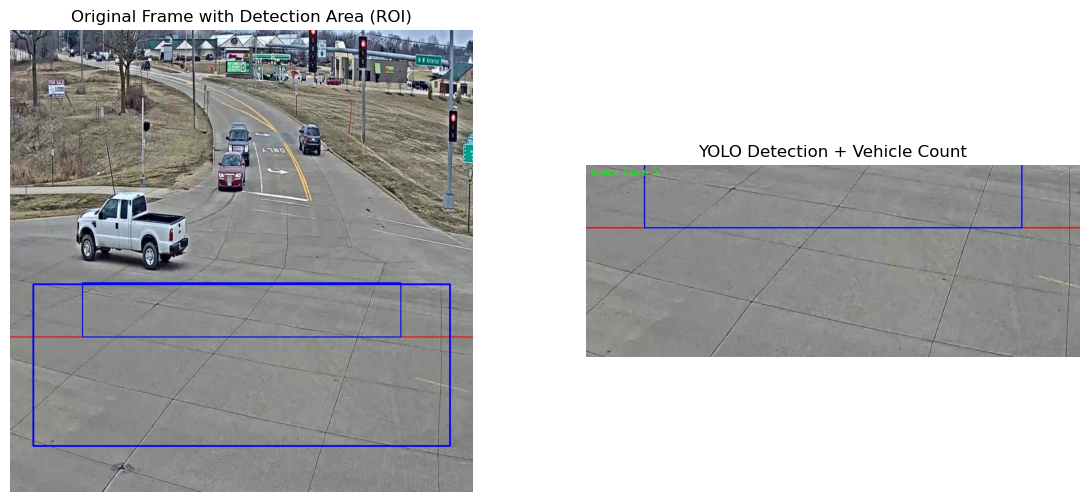

Vehicle count: 0


In [15]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# =========================
# LOAD YOLO MODEL
# =========================
model = YOLO("yolov8l.pt")   # Large model for aerial/small objects

# =========================
# LOAD IMAGE
# =========================
img_path = r"E:\intelligent-traffic analysis\outputsS\c002_vdo\frame_00086.jpg"
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError("Image not found. Check path.")

# =========================
# DEFINE LARGE ROI (DYNAMIC)
# =========================
h, w, _ = img.shape

x1 = int(0.05 * w)
x2 = int(0.95 * w)
y1 = int(0.55 * h)
y2 = int(0.90 * h)

roi = img[y1:y2, x1:x2]

# =========================
# UPSCALE ROI (VERY IMPORTANT)
# =========================
roi_up = cv2.resize(
    roi,
    None,
    fx=2.5,
    fy=2.5,
    interpolation=cv2.INTER_CUBIC
)

# =========================
# YOLO DETECTION
# =========================
VEHICLE_CLASSES = [2, 3, 5, 7]  # car, motorbike, bus, truck

results = model.predict(
    roi_up,
    conf=0.05,
    imgsz=1536,
    classes=VEHICLE_CLASSES,
    verbose=False
)

vehicle_count = len(results[0].boxes)

# =========================
# DRAW DETECTIONS
# =========================
annotated_roi = results[0].plot()

cv2.putText(
    annotated_roi,
    f"Vehicle Count: {vehicle_count}",
    (30, 60),
    cv2.FONT_HERSHEY_SIMPLEX,
    1.5,
    (0, 255, 0),
    4
)

# =========================
# DRAW ROI ON ORIGINAL IMAGE
# =========================
vis = img.copy()
cv2.rectangle(vis, (x1, y1), (x2, y2), (255, 0, 0), 3)

# =========================
# VISUALIZE OUTPUT
# =========================
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("Original Frame with Detection Area (ROI)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(annotated_roi, cv2.COLOR_BGR2RGB))
plt.title("YOLO Detection + Vehicle Count")
plt.axis("off")

plt.show()

print("Vehicle count:", vehicle_count)


In [18]:
pip install ultralytics lap


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.5 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


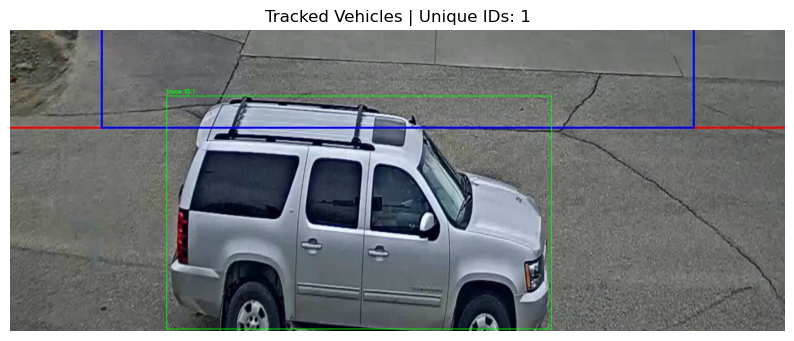

Tracked vehicle IDs: {1}


In [22]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# =========================
# LOAD MODEL
# =========================
model = YOLO("yolov8l.pt")

# =========================
# LOAD IMAGE (single frame demo)
# =========================
img_path = r"E:\intelligent-traffic analysis\outputsS\c008_vdo\frame_00077.jpg"
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError("Check image path")

h, w, _ = img.shape

# =========================
# DEFINE LARGE ROI
# =========================
x1 = int(0.05 * w)
x2 = int(0.95 * w)
y1 = int(0.55 * h)
y2 = int(0.90 * h)

roi = img[y1:y2, x1:x2]

# =========================
# UPSCALE ROI
# =========================
roi_up = cv2.resize(
    roi, None,
    fx=2.5, fy=2.5,
    interpolation=cv2.INTER_CUBIC
)

# =========================
# YOLO + TRACKING
# =========================
results = model.track(
    roi_up,
    conf=0.05,
    imgsz=1536,
    classes=[2, 3, 5, 7],  # vehicles
    tracker="bytetrack.yaml",
    persist=True,
    verbose=False
)

# =========================
# DRAW RESULTS
# =========================
annotated_roi = roi_up.copy()
vehicle_ids = set()

for r in results:
    if r.boxes.id is None:
        continue

    boxes = r.boxes.xyxy.cpu().numpy()
    ids = r.boxes.id.cpu().numpy()
    clss = r.boxes.cls.cpu().numpy()

    for box, track_id, cls in zip(boxes, ids, clss):
        xA, yA, xB, yB = map(int, box)
        label = f"{model.names[int(cls)]} ID:{int(track_id)}"
        vehicle_ids.add(int(track_id))

        cv2.rectangle(annotated_roi, (xA, yA), (xB, yB), (0, 255, 0), 2)
        cv2.putText(
            annotated_roi,
            label,
            (xA, yA - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.7,
            (0, 255, 0),
            2
        )

# =========================
# VISUALIZE
# =========================
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_roi, cv2.COLOR_BGR2RGB))
plt.title(f"Tracked Vehicles | Unique IDs: {len(vehicle_ids)}")
plt.axis("off")
plt.show()

print("Tracked vehicle IDs:", vehicle_ids)


In [ ]:
import cv2
from ultralytics import YOLO

# =========================
# PATHS
# =========================
VIDEO_PATH = r"E:\intelligent-traffic analysis\data\videos\FINAL_VIDEOS\c010_vdo.avi"
OUTPUT_VIDEO = r"E:\tracked_output_static_roi.mp4"

# =========================
# LOAD YOLO MODEL
# =========================
model = YOLO("yolov8l.pt")

# =========================
# OPEN VIDEO
# =========================
cap = cv2.VideoCapture(VIDEO_PATH)
if not cap.isOpened():
    raise Exception("Cannot open video")

fps = int(cap.get(cv2.CAP_PROP_FPS))
W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

writer = cv2.VideoWriter(
    OUTPUT_VIDEO,
    cv2.VideoWriter_fourcc(*"mp4v"),
    fps,
    (W, H)
)

# =========================
# STATIC ROI DEFINITION
# =========================
x1 = int(0.05 * W)
x2 = int(0.95 * W)
y1 = int(0.60 * H)
y2 = int(0.90 * H)

UPSCALE_FACTOR = 2.5

# =========================
# PROCESS VIDEO
# =========================
while True:
    ret, frame = cap.read()
    if not ret:
        break

    roi = frame[y1:y2, x1:x2]

    # ---- UPSCALE ROI ----
    roi_up = cv2.resize(
        roi, None,
        fx=UPSCALE_FACTOR,
        fy=UPSCALE_FACTOR,
        interpolation=cv2.INTER_CUBIC
    )

    # ---- YOLO + TRACKING ----
    results = model.track(
        roi_up,
        conf=0.05,
        imgsz=1536,
        classes=[2, 3, 5, 7],  # vehicles
        tracker="bytetrack.yaml",
        persist=True,
        verbose=False
    )

    # ---- DRAW TRACKING RESULTS ----
    for r in results:
        if r.boxes.id is None:
            continue

        boxes = r.boxes.xyxy.cpu().numpy()
        ids = r.boxes.id.cpu().numpy()
        clss = r.boxes.cls.cpu().numpy()

        for box, track_id, cls in zip(boxes, ids, clss):
            xa, ya, xb, yb = map(int, box)

            # scale back to original ROI size
            xa = int(xa / UPSCALE_FACTOR)
            xb = int(xb / UPSCALE_FACTOR)
            ya = int(ya / UPSCALE_FACTOR)
            yb = int(yb / UPSCALE_FACTOR)

            cv2.rectangle(
                frame,
                (x1 + xa, y1 + ya),
                (x1 + xb, y1 + yb),
                (0, 255, 0),
                2
            )

            cv2.putText(
                frame,
                f"{model.names[int(cls)]} ID:{int(track_id)}",
                (x1 + xa, y1 + ya - 5),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (0, 255, 0),
                2
            )

    # ---- DRAW STATIC ROI BOX ----
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 3)
    cv2.putText(
        frame,
        "Static ROI",
        (x1 + 10, y1 - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (255, 0, 0),
        2
    )

    writer.write(frame)

# =========================
# CLEANUP
# =========================
cap.release()
writer.release()

print(" Video analysis completed")
print(" Output saved at:", OUTPUT_VIDEO)


In [ ]:
import os

VIDEO_PATH = r"E:\FINAL_VIDEOS\c002_vdo.mp4"

print("Exists:", os.path.exists(VIDEO_PATH))
print("Is file:", os.path.isfile(VIDEO_PATH))


In [29]:
import os

VIDEO_PATH = r"E:\FINAL_VIDEOS\c002_vdo.avi"

print("Exists:", os.path.exists(VIDEO_PATH))
print("Is file:", os.path.isfile(VIDEO_PATH))


Exists: False
Is file: False


In [30]:
import cv2

VIDEO_PATH = r"E:\FINAL_VIDEOS\c002_vdo.avi"

backends = {
    "DEFAULT": cv2.VideoCapture(VIDEO_PATH),
    "FFMPEG": cv2.VideoCapture(VIDEO_PATH, cv2.CAP_FFMPEG),
    "DSHOW": cv2.VideoCapture(VIDEO_PATH, cv2.CAP_DSHOW),
    "MSMF": cv2.VideoCapture(VIDEO_PATH, cv2.CAP_MSMF),
}

for name, cap in backends.items():
    print(name, "opened:", cap.isOpened())
    cap.release()


DEFAULT opened: False
FFMPEG opened: False
DSHOW opened: False
MSMF opened: False


In [ ]:
import cv2
from ultralytics import YOLO

# =========================
# PATHS
# =========================
VIDEO_PATH = r"E:\intelligent-traffic analysis\data\videos\FINAL_VIDEOS\c010_vdo.avi"
OUTPUT_VIDEO = r"E:\tracked_output_static_roi.mp4"

# =========================
# LOAD YOLO MODEL
# =========================
model = YOLO("yolov8l.pt")

# =========================
# OPEN VIDEO
# =========================
cap = cv2.VideoCapture(VIDEO_PATH)
if not cap.isOpened():
    raise Exception("Cannot open video")

fps = int(cap.get(cv2.CAP_PROP_FPS))
W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

OUTPUT_VIDEO = r"E:\tracked_output_static_roi.avi"

writer = cv2.VideoWriter(
    OUTPUT_VIDEO,
    cv2.VideoWriter_fourcc(*"XVID"),
    fps,
    (W, H)
)


# =========================
# STATIC ROI
# =========================
x1 = int(0.05 * W)
x2 = int(0.95 * W)
y1 = int(0.60 * H)
y2 = int(0.90 * H)

UPSCALE_FACTOR = 2.5

# =========================
# UNIQUE VEHICLE STORAGE
# =========================
unique_vehicle_ids = set()

# =========================
# PROCESS VIDEO
# =========================
while True:
    ret, frame = cap.read()
    if not ret:
        break

    roi = frame[y1:y2, x1:x2]

    roi_up = cv2.resize(
        roi, None,
        fx=UPSCALE_FACTOR,
        fy=UPSCALE_FACTOR,
        interpolation=cv2.INTER_CUBIC
    )

    results = model.track(
        roi_up,
        conf=0.05,
        imgsz=1536,
        classes=[2, 3, 5, 7],
        tracker="bytetrack.yaml",
        persist=True,
        verbose=False
    )

    current_frame_ids = set()

    for r in results:
        if r.boxes.id is None:
            continue

        boxes = r.boxes.xyxy.cpu().numpy()
        ids = r.boxes.id.cpu().numpy()
        clss = r.boxes.cls.cpu().numpy()

        for box, track_id, cls in zip(boxes, ids, clss):
            track_id = int(track_id)

            # Add to sets
            unique_vehicle_ids.add(track_id)
            current_frame_ids.add(track_id)

            xa, ya, xb, yb = map(int, box)

            # scale back
            xa = int(xa / UPSCALE_FACTOR)
            xb = int(xb / UPSCALE_FACTOR)
            ya = int(ya / UPSCALE_FACTOR)
            yb = int(yb / UPSCALE_FACTOR)

            cv2.rectangle(
                frame,
                (x1 + xa, y1 + ya),
                (x1 + xb, y1 + yb),
                (0, 255, 0),
                2
            )

            cv2.putText(
                frame,
                f"{model.names[int(cls)]} ID:{track_id}",
                (x1 + xa, y1 + ya - 5),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (0, 255, 0),
                2
            )

    # =========================
    # DRAW COUNTS
    # =========================
    cv2.putText(
        frame,
        f"Frame Vehicles: {len(current_frame_ids)}",
        (30, 40),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 255, 255),
        2
    )

    cv2.putText(
        frame,
        f"Total Unique Vehicles: {len(unique_vehicle_ids)}",
        (30, 80),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 255),
        2
    )

    # Draw ROI
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 3)

    writer.write(frame)

# =========================
# CLEANUP
# =========================
cap.release()
writer.release()

print("✅ Video analysis completed")
print("🚗 Total unique vehicles detected:", len(unique_vehicle_ids))
print("📁 Output saved at:", OUTPUT_VIDEO)  

In [1]:
import os

OUTPUT_VIDEO = r"E:\tracked_output_static_roi.mp4"

print("Exists:", os.path.exists(OUTPUT_VIDEO))
print("Path:", OUTPUT_VIDEO)


Exists: True
Path: E:\tracked_output_static_roi.mp4


In [1]:
import cv2
import math
from ultralytics import YOLO

# =========================
# PATHS
# =========================
VIDEO_PATH = r"E:\intelligent-traffic analysis\data\videos\FINAL_VIDEOS\c010_vdo.avi"
OUTPUT_VIDEO = r"E:\tracked_output_final_with_violation_and_rash.avi"

# =========================
# LOAD YOLO MODEL
# =========================
model = YOLO("yolov8l.pt")

# =========================
# OPEN VIDEO
# =========================
cap = cv2.VideoCapture(VIDEO_PATH)
if not cap.isOpened():
    raise Exception("Cannot open video")

fps = int(cap.get(cv2.CAP_PROP_FPS))
if fps == 0:
    fps = 25

W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

writer = cv2.VideoWriter(
    OUTPUT_VIDEO,
    cv2.VideoWriter_fourcc(*"XVID"),
    fps,
    (W, H)
)

# =========================
# STATIC ROI
# =========================
x1 = int(0.05 * W)
x2 = int(0.95 * W)
y1 = int(0.60 * H)
y2 = int(0.90 * H)

UPSCALE = 2.5

# =========================
# STOP-LINE SETTINGS
# =========================
STOP_LINE_Y = int(0.70 * H)
prev_centers_y = {}

# =========================
# RASH DRIVING SETTINGS
# =========================
prev_centers_xy = {}
RASH_SPEED_THRESHOLD = 40   # pixels/frame (safe value)

# =========================
# STORAGE
# =========================
unique_vehicle_ids = set()
stopline_violators = set()
rash_drivers = set()

# =========================
# PROCESS VIDEO
# =========================
while True:
    ret, frame = cap.read()
    if not ret:
        break

    roi = frame[y1:y2, x1:x2]

    roi_up = cv2.resize(
        roi, None,
        fx=UPSCALE, fy=UPSCALE,
        interpolation=cv2.INTER_CUBIC
    )

    results = model.track(
        roi_up,
        conf=0.05,
        imgsz=1536,
        classes=[2, 3, 5, 7],
        tracker="bytetrack.yaml",
        persist=True,
        verbose=False
    )

    current_frame_ids = set()

    for r in results:
        if r.boxes.id is None:
            continue

        boxes = r.boxes.xyxy.cpu().numpy()
        ids = r.boxes.id.cpu().numpy()
        clss = r.boxes.cls.cpu().numpy()

        for box, track_id, cls in zip(boxes, ids, clss):
            track_id = int(track_id)
            unique_vehicle_ids.add(track_id)
            current_frame_ids.add(track_id)

            xa, ya, xb, yb = map(int, box)

            # scale back
            xa = int(xa / UPSCALE)
            xb = int(xb / UPSCALE)
            ya = int(ya / UPSCALE)
            yb = int(yb / UPSCALE)

            center_x = x1 + (xa + xb) // 2
            center_y = y1 + (ya + yb) // 2

            # -------------------------
            # STOP-LINE VIOLATION
            # -------------------------
            if track_id in prev_centers_y:
                if prev_centers_y[track_id] < STOP_LINE_Y <= center_y:
                    stopline_violators.add(track_id)
            prev_centers_y[track_id] = center_y

            # -------------------------
            # RASH DRIVING CHECK
            # -------------------------
            if track_id in prev_centers_xy:
                px, py = prev_centers_xy[track_id]
                dist = math.hypot(center_x - px, center_y - py)
                if dist > RASH_SPEED_THRESHOLD:
                    rash_drivers.add(track_id)

            prev_centers_xy[track_id] = (center_x, center_y)

            # -------------------------
            # DRAW RESULTS
            # -------------------------
            if track_id in rash_drivers:
                color = (0, 165, 255)  # ORANGE
                label = f"RASH ID:{track_id}"
            elif track_id in stopline_violators:
                color = (0, 0, 255)    # RED
                label = f"VIOLATION ID:{track_id}"
            else:
                color = (0, 255, 0)    # GREEN
                label = f"{model.names[int(cls)]} ID:{track_id}"

            cv2.rectangle(
                frame,
                (x1 + xa, y1 + ya),
                (x1 + xb, y1 + yb),
                color,
                2
            )

            cv2.putText(
                frame,
                label,
                (x1 + xa, y1 + ya - 5),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                color,
                2
            )

    # =========================
    # DRAW GUIDES & INFO
    # =========================
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 3)
    cv2.line(frame, (0, STOP_LINE_Y), (W, STOP_LINE_Y), (0, 0, 255), 2)

    cv2.putText(frame, f"Frame Vehicles: {len(current_frame_ids)}",
                (30, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    cv2.putText(frame, f"Total Vehicles: {len(unique_vehicle_ids)}",
                (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.putText(frame, f"Stop-Line Violations: {len(stopline_violators)}",
                (30, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.putText(frame, f"Rash Drivers: {len(rash_drivers)}",
                (30, 160), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 165, 255), 2)

    writer.write(frame)

# =========================
# CLEANUP
# =========================
cap.release()
writer.release()

print("FINAL VIDEO ANALYSIS COMPLETED")
print("Total unique vehicles:", len(unique_vehicle_ids))
print("Stop-line violations:", len(stopline_violators))
print("Rash driving detected:", len(rash_drivers))
print("Output saved at:", OUTPUT_VIDEO)


FINAL VIDEO ANALYSIS COMPLETED
Total unique vehicles: 71
Stop-line violations: 19
Rash driving detected: 20
Output saved at: E:\tracked_output_final_with_violation_and_rash.avi


In [3]:
import csv
import os
# =========================
# CSV SETUP
# =========================
os.makedirs("outputs/metrics", exist_ok=True)
csv_path = "outputs/metrics/traffic_metrics.csv"

csv_file = open(csv_path, mode="w", newline="")
csv_writer = csv.writer(csv_file)

csv_writer.writerow([
    "timestamp_sec",
    "total_vehicles",
    "queue_length",
    "density",
    "cars",
    "bikes",
    "buses",
    "trucks",
    "stopline_violations",
    "rash_drivers"
])



108

In [5]:
import cv2
import csv
import os
import numpy as np

# =========================
# PATHS
# =========================
INPUT_VIDEO = r"E:\intelligent-traffic analysis\outputsS\tracked_output_with_stopline.avi"
CSV_PATH = "outputs/metrics/traffic_metrics.csv"

os.makedirs("outputs/metrics", exist_ok=True)

# =========================
# OPEN VIDEO
# =========================
cap = cv2.VideoCapture(INPUT_VIDEO)
if not cap.isOpened():
    raise Exception("❌ Cannot open annotated video")

fps = int(cap.get(cv2.CAP_PROP_FPS))
if fps == 0:
    fps = 25

# =========================
# CSV SETUP
# =========================
csv_file = open(CSV_PATH, mode="w", newline="")
csv_writer = csv.writer(csv_file)

csv_writer.writerow([
    "timestamp_sec",
    "total_vehicles",
    "normal_vehicles",
    "stopline_violations",
    "rash_drivers"
])

# =========================
# COLOR RANGES (BGR)
# =========================
GREEN_LOW = np.array([0, 200, 0])
GREEN_HIGH = np.array([80, 255, 80])

RED_LOW = np.array([0, 0, 200])
RED_HIGH = np.array([80, 80, 255])

ORANGE_LOW = np.array([0, 120, 200])
ORANGE_HIGH = np.array([80, 200, 255])

# =========================
# PROCESS VIDEO
# =========================
frame_count = 0
normal = violation = rash = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Create color masks
    green_mask = cv2.inRange(frame, GREEN_LOW, GREEN_HIGH)
    red_mask = cv2.inRange(frame, RED_LOW, RED_HIGH)
    orange_mask = cv2.inRange(frame, ORANGE_LOW, ORANGE_HIGH)

    # Count contours (boxes)
    green_cnts, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    red_cnts, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    orange_cnts, _ = cv2.findContours(orange_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    normal = len(green_cnts)
    violation = len(red_cnts)
    rash = len(orange_cnts)

    # Log once per second
    if frame_count % fps == 0:
        timestamp = frame_count // fps
        total = normal + violation + rash

        csv_writer.writerow([
            timestamp,
            total,
            normal,
            violation,
            rash
        ])

cap.release()
csv_file.close()

print("CSV extraction completed")
print("CSV saved at:", CSV_PATH)


CSV extraction completed
CSV saved at: outputs/metrics/traffic_metrics.csv


In [9]:
import os

for drive in ["C:\\", "D:\\", "E:\\"]:
    for root, dirs, files in os.walk(drive):
        for f in files:
            if "traffic" in f.lower() and f.endswith(".csv"):
                print(os.path.join(root, f))


C:\Users\nayan\outputs\metrics\traffic_metrics.csv
E:\intelligent-traffic analysis\outputs\traffic_metrics.csv
